# **Física Computacional.**  **Ramirez Juarez Enrique Isaias**
# **Tarea 3.**

# **Ejercicio 1.**


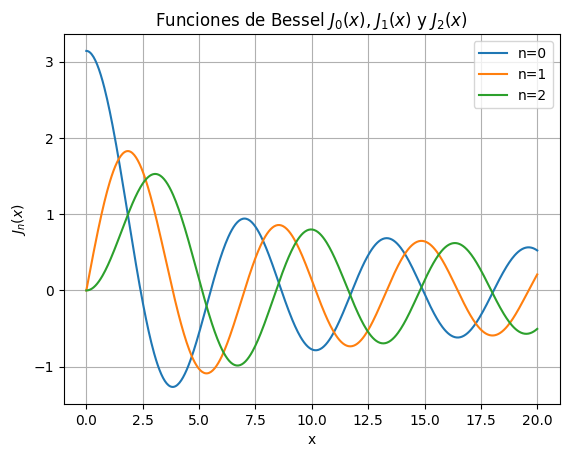

In [ ]:
#a)
#Utilizamos el metodo de simpson para resolver la integral.
import numpy as np
import matplotlib.pyplot as plt

def simpsion(f, a, b, N):
    if N % 2 == 1:  # Simpson requiere que N sea par
        N += 1
    h = (b - a) / N
    s_p, s_i = 0, 0
    for k in range(1, N, 2):  # suma de impares
        s_p += f(a + k * h)
    for k in range(2, N-1, 2):  # suma de pares
        s_i += f(a + k * h)
    return (h / 3) * (f(a) + f(b) + 4 * s_p + 2 * s_i)

def J(x, n, N=1000):
    return simpsion(lambda t: np.cos(n * t - x * np.sin(t)), 0, np.pi, N)

# a) Graficar J_0, J_1 y J_2 (Esta parte la hicimos en clase :) )
x_val = np.linspace(0, 20, 500)
n = [0, 1, 2]
J_val = [[J(x, ni) for x in x_val] for ni in n]

for i in range(3):
    plt.plot(x_val, J_val[i], label=f'n={i}')


plt.xlabel('x')
plt.ylabel('$J_n(x)$')
plt.title('Funciones de Bessel $J_0(x)$, $J_1(x)$ y $J_2(x)$')
plt.legend()
plt.grid(True)
plt.show()

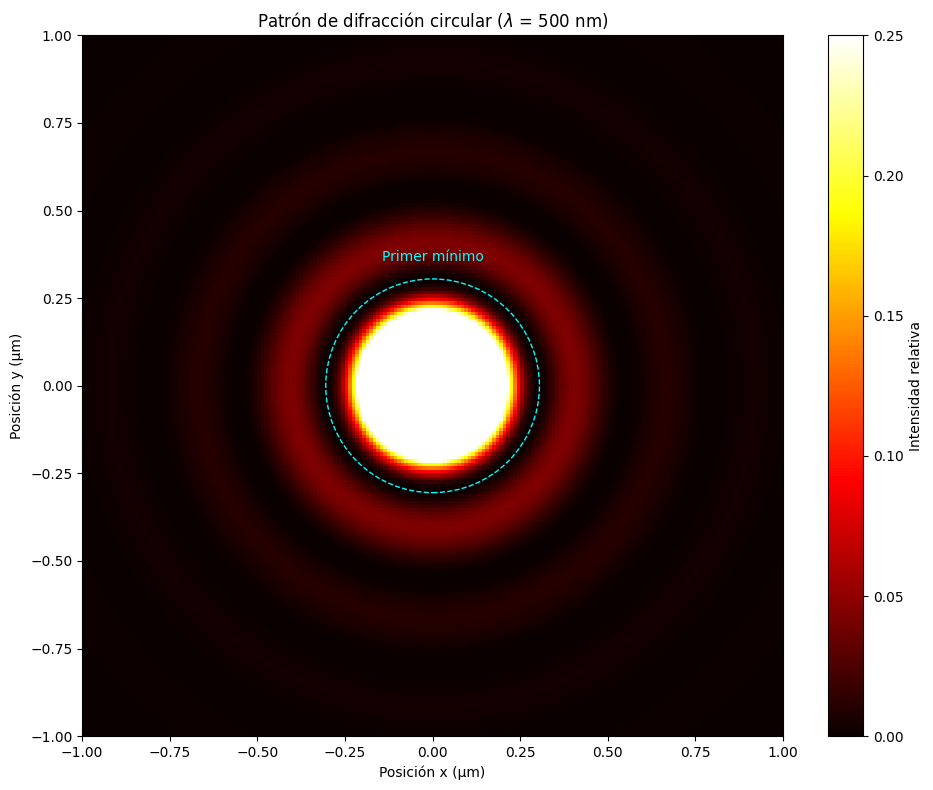

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Este codigo tardo exacto 1min 42 seg en ejecutar, no se como optimizarlo sin usar la funcion de bessel de la paqueteria :(

def simpsion(f, a, b, N):
    if N % 2 == 1:  # Simpson requiere que N sea par
        N += 1
    h = (b - a) / N
    s_p, s_i = 0, 0
    for k in range(1, N, 2):  # suma de impares
        s_p += f(a + k * h)
    for k in range(2, N-1, 2):  # suma de pares
        s_i += f(a + k * h)
    return (h / 3) * (f(a) + f(b) + 4 * s_p + 2 * s_i)

def J(x, n, N=1000):
    return simpsion(lambda t: np.cos(n * t - x * np.sin(t)), 0, np.pi, N)

def J1(x):
    return J(x, 1)

def intensity(r, k):
    if r == 0:
        return 0.25  # Valor límite cuando r→0
    kr = k * r
    return (J1(kr) / kr)**2

# Parámetros físicos
lambda_ = 500e-9  # Longitud de onda (500 nm)
k = 2 * np.pi / lambda_  # Número de onda

# Creamos la malla de puntos
size = 1e-6  # 1 micrómetro
points = 200  # Resolución (reducida para mayor velocidad)
x = np.linspace(-size, size, points)
y = np.linspace(-size, size, points)
X, Y = np.meshgrid(x, y)

# Calculamos la distancia radial para cada punto
R = np.sqrt(X**2 + Y**2)

# Vectorizamos la función de intensidad para mejor rendimiento (Que problemas da esta parte :( )
vector_intensity = np.vectorize(lambda r: intensity(r, k))

# Calculamos intensidad en toda la malla
I = vector_intensity(R)

# Creamos el gráfico
plt.figure(figsize=(10, 8))
plt.imshow(I, extent=[-size*1e6, size*1e6, -size*1e6, size*1e6],
           cmap='hot', vmin=0, vmax=0.25)
plt.colorbar(label='Intensidad relativa')
plt.title('Patrón de difracción circular ($\lambda$ = 500 nm)')
plt.xlabel('Posición x (μm)')
plt.ylabel('Posición y (μm)')

# Marcamos el primer mínimo (donde J₁(kr) = 0)
first_zero = 3.8317 / k  # Primer cero de J₁
plt.gca().add_patch(plt.Circle((0, 0), first_zero*1e6,
                              color='cyan', fill=False, linestyle='--'))
plt.text(0, first_zero*1e6 + 0.05, 'Primer mínimo',
        color='cyan', ha='center')

plt.tight_layout()
plt.show()

# **Ejercicio 2.**
a)

En la expresión general de la capacidad calorífica de Debye:  

$C_V = 9 N k_B \left( \frac{T}{\Theta_D} \right)^3 \int_0^{\Theta_D/T} \frac{x^4 e^x}{(e^x - 1)^2} dx$

Si tomamos $\Theta_D = 1$, $N=1$ y $k_B=1$, la ecuación se reduce a:  

$C_V = 9 T^3 \int_0^{1/T} \frac{x^4 e^x}{(e^x - 1)^2} dx$

Vamos a realizar el codigo con una versión **adimensionalizada** del problema de Debye (para que sea más sencilla).

## Comparacion de metodos:

Sabemos que la regla de Simpson tiene un error del orden $O(h^5)$ por subintervalo, lo que la hace más precisa que la regla del trapecio (error $O(h^3)$) para funciones suaves.
Además aprovecha mejor el número de evaluaciones de la función al usar polinomios cuadráticos en lugar de lineales. También, los métodos de Monte Carlo, tanto "Hit and Miss" como el "Crudo", son menos precisos en 1D (su error decrece como $O(1/\sqrt{N})$), pero su verdadera ventaja aparece en integrales multidimensionales o con dominios irregulares, donde técnicas como Simpson o Trapecio resultan ineficientes.



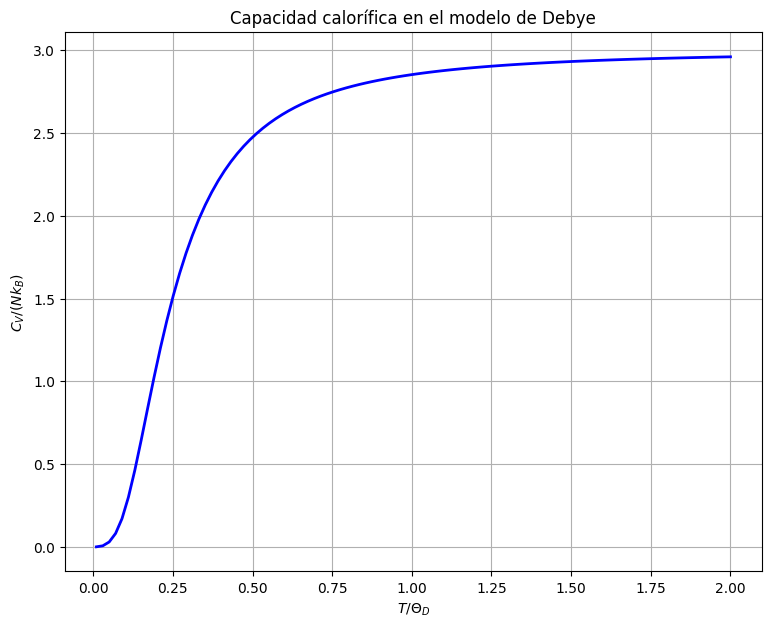

In [ ]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función para integración por el método de Simpson
def simpsion(f,a,b,N):
    # Calcula el ancho de cada subintervalo
    h=abs(b-a)/N
    # Inicializa acumuladores para términos pares e impares
    s_p,s_i=0,0
    # Evalúa la función en el límite inferior
    fa=f(a)
    # Evalúa la función en el límite superior
    fb=f(b)
    # Bucle para sumar los términos en puntos pares
    for k in range(2, N, 2):  # suma de pares.
        # Acumula el valor de la función en punto par
        s_p += f(a + k * h)
    # Bucle para sumar los términos en puntos impares
    for k in range(1, N, 2):  # suma de impares.
        # Acumula el valor de la función en punto impar
        s_i += f(a + k * h)
    # Aplica la fórmula compuesta de Simpson 1/3
    s=(h/3)*(fa+fb+4*s_p+2*s_i)
    # Retorna el valor calculado de la integral
    return s

# Definición de la función del integrando para capacidad calorífica
def cv_mini(x):
    # Manejo especial para x=0 (evita división por cero)
    if x == 0:
        # Retorna 0 cuando x es cero
        return 0.0
    # Calcula el numerador de la función
    num = x**4 * np.exp(x)
    # Calcula el denominador de la función
    den = (np.exp(x) - 1)**2
    # Retorna el valor de la función
    return num / den

# Crea un array de valores de temperatura desde 0.01 hasta 2
Temp = np.linspace(0.01, 2, 100)

# Función para calcular la capacidad calorífica para un rango de temperaturas
def Cv2(T, N):
    # Inicializa lista para almacenar resultados
    Cv_valores1 = []  # Lista para guardar los resultados
    # Itera sobre cada valor de temperatura
    for t in Temp:
        # Verifica si la temperatura es mayor que cero
        if t > 0:
            # Calcula la integral usando el método de Simpson
            integral = simpsion(cv_mini, 0, 1/t, N)  # Calcula la integral
            # Aplica la fórmula de Debye para capacidad calorífica
            Cv = 9 * (t**3) * integral  # Aplica la fórmula
        else:
            # Asigna cero si la temperatura es cero
            Cv = 0  # Si t es 0, entonces Cv es 0
        # Agrega el resultado a la lista
        Cv_valores1.append(Cv)  # Guarda el resultado
    # Retorna todos los valores calculados
    return Cv_valores1  # Devuelve la lista con los valores calculados


Cv2_valores = Cv2(Temp, N=1000) # Calculamos los valores de capacidad calorífica con N=1000 intervalos


plt.figure(figsize=(9, 7)) # Configuramos el tamaño de la figura para la grafica
plt.plot(Temp, Cv2_valores, 'b-', linewidth=2) # Creamos el gráfico
plt.xlabel('$T / \Theta_D$') # Etiqueta el eje X
plt.ylabel('$C_V / (N k_B)$') # Etiqueta el eje Y
plt.title('Capacidad calorífica en el modelo de Debye') # Título del gráfico
plt.grid(True) # Cuadrícula en la grafica
plt.show() # Mostramos el gráfico

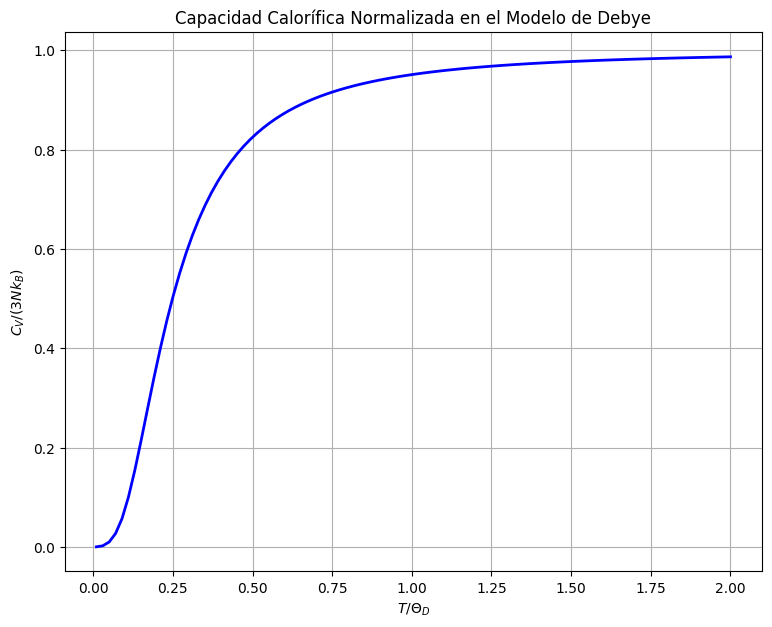

<Figure size 900x700 with 0 Axes>

<Figure size 900x700 with 0 Axes>

In [ ]:
# Bliotecas
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función para calcular la capacidad calorífica normalizada
def Cv2(T, N=1000):  # Cálculo de C_V / (3NkB)
    # Lista para almacenar los valores calculados de capacidad caloríficacalorífica
    Cv_valores2 = []
    # Iteración sobre cada valor de temperatura en el array T
    for t in T:
        # Verificación para evitar división por cero
        if t > 0:
            # Cálculo de la integral usando la función simpsion (regla de Simpson)
            integral = simpsion(cv_mini, 0, 1/t, N)
            # Cálculo de la capacidad calorífica normalizada (dividida por 3)
            Cv = (9 * (t**3) * integral) / 3  # Normalización por factor 3
        else:
            # Caso cuando la temperatura es 0 (Cv = 0)
            Cv = 0
        # Almacenamiento del valor calculado en la lista
        Cv_valores2.append(Cv)
    # Retorno de todos los valores calculados
    return Cv_valores2

# Llamamos a la función Cv2 con el array de temperaturas Temp
C_V2 = Cv2(Temp)


plt.figure(figsize=(9, 7))  # Tamaño de la figura del grafico
plt.plot(Temp, C_V2, 'b-', linewidth=2) #Creamos el grafico
plt.xlabel('$T / \Theta_D$') # Etiqueta del eje X
plt.ylabel('$C_V / (3N k_B)$') # Etiqueta del eje Y
plt.title('Capacidad Calorífica Normalizada en el Modelo de Debye') # Título del gráfico
plt.grid(True) # Cuadrícula en la grafica
plt.show() # Mostramos el gráfico
plt.figure(figsize=(9, 7)) # Configuramos el tamaño de la figura para la grafica

# **Ejercicio 3.**


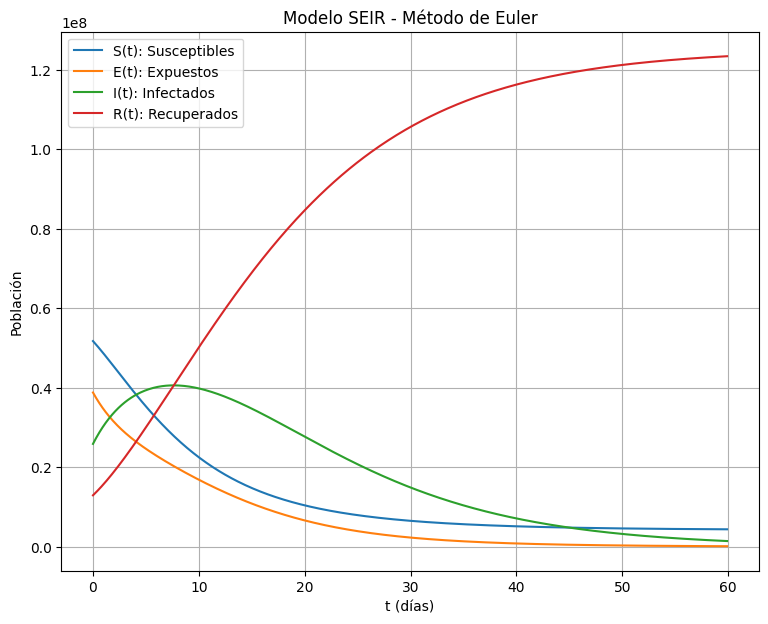

In [ ]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt

# PARÁMETROS
N = 129320000  # Población total
beta = 0.2881  # Tasa de transmisión (infectividad)
sigma = 0.1994  # Tasa de progresión de expuesto a infectado (1/periodo de incubación)
gamma = 0.1  # Tasa de recuperación (1/duracion de la infección)

# CONDICIONES INICIALES
S = 51731600  # Susceptibles iniciales
E = 38789700  # Expuestos iniciales
I = 25865800  # Infectados iniciales
R = 12932900  # Recuperados iniciales

# CONFIGURACIÓN TEMPORAL
a, b = 0.0, 60.0  # Intervalo de tiempo [a,b] en días
N_pasos = 600  # Número de pasos de tiempo
h = (b - a) / N_pasos  # Tamaño del paso temporal (resolución)

# ALMACENAMIENTO DE RESULTADOS
t_e = []  # Lista para almacenar tiempos
S_e = []  # Lista para susceptibles en cada tiempo
E_e = []  # Lista para expuestos en cada tiempo
I_e = []  # Lista para infectados en cada tiempo
R_e = []  # Lista para recuperados en cada tiempo

# MÉTODO DE EULER
for t in np.arange(a, b, h):
    # Almacenar estado actual
    t_e.append(t)
    S_e.append(S)
    E_e.append(E)
    I_e.append(I)
    R_e.append(R)

    # ECUACIONES DIFERENCIALES DEL MODELO SEIR
    # dS/dt: Cambio en susceptibles (S -> E por infección)
    dS = -beta * S * I / N

    # dE/dt: Cambio en expuestos (S -> E por infección, E -> I por progresión)
    dE = beta * S * I / N - sigma * E

    # dI/dt: Cambio en infectados (E -> I por progresión, I -> R por recuperación)
    dI = sigma * E - gamma * I

    # dR/dt: Cambio en recuperados (I -> R por recuperación)
    dR = gamma * I

    # ACTUALIZACIÓN DE ESTADOS (MÉTODO DE EULER)
    S += h * dS  # Actualizar susceptibles
    E += h * dE  # Actualizar expuestos
    I += h * dI  # Actualizar infectados
    R += h * dR  # Actualizar recuperados

# VISUALIZACIÓN DE RESULTADOS
plt.figure(figsize=(9, 7))  # Crear figura de 9x7 pulgadas

# Graficar cada serie temporal
plt.plot(t_e, S_e, label='S(t): Susceptibles')  # Susceptibles vs tiempo
plt.plot(t_e, E_e, label='E(t): Expuestos')    # Expuestos vs tiempo
plt.plot(t_e, I_e, label='I(t): Infectados')   # Infectados vs tiempo
plt.plot(t_e, R_e, label='R(t): Recuperados')  # Recuperados vs tiempo

plt.xlabel('t (días)')  # Etiqueta eje X
plt.ylabel('Población')  # Etiqueta eje Y
plt.title('Modelo SEIR - Método de Euler')  # Título
plt.grid()  # Activamos la cuadrícula
plt.legend()  # Mostramos la leyenda
plt.show() # Mostramos el gráfico

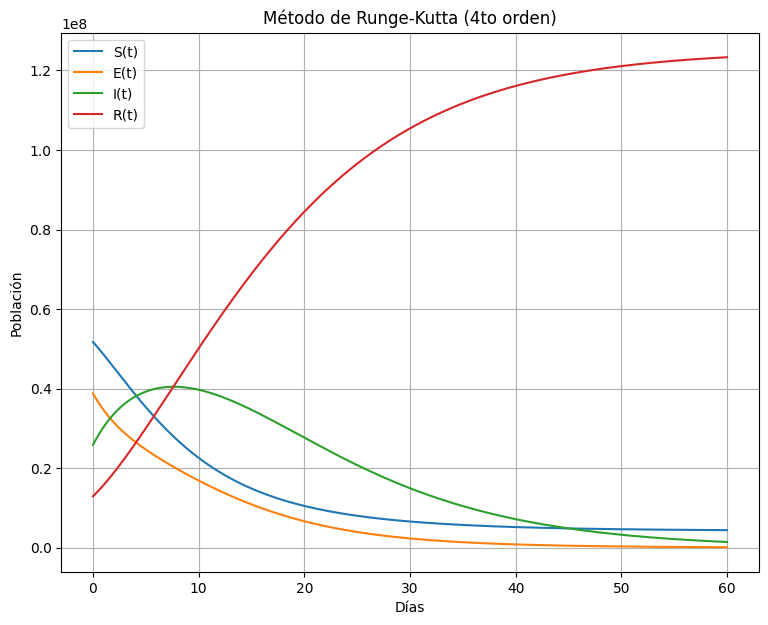

In [ ]:
#Método de Ruge-Kutta cuarto orden
import numpy as np
import matplotlib.pyplot as plt

N = 129320000      # Población total
beta = 0.2881      # Tasa de transmisión
sigma = 0.1994     # Tasa de progresión (1/periodo incubación)
gamma = 0.1        # Tasa de recuperación (1/periodo infeccioso)

# Condiciones iniciales (población en cada compartimento)
S0 = 51731600      # Susceptibles iniciales
E0 = 38789700      # Expuestos iniciales
I0 = 25865800      # Infectados iniciales
R0 = 12932900      # Recuperados iniciales

# Ecuaciones del sistema SEIR
def Ecua_SEIR(S, E, I, R):
    dS = -beta * S * I / N   # Susceptibles: disminuyen por contagios
    dE = beta * S * I / N - sigma * E  # Expuestos: nuevos contagios - incubados
    dI = sigma * E - gamma * I  # Infectados: incubados - recuperados
    dR = gamma * I             # Recuperados: aumentan con recuperaciones
    return dS, dE, dI, dR

# Tiempo de simulación
a = 0.0
b = 60.0
dt = 0.1  # Tamaño del paso
pasos = int((b - a) / dt)
t = np.linspace(a, b, pasos + 1)

# Listas para guardar los resultados, comenzando con las condiciones iniciales
S_rk = [S0]
E_rk = [E0]
I_rk = [I0]
R_rk = [R0]

for paso in range(pasos):
    # Tomamos los valores actuales
    S_actual = S_rk[paso]
    E_actual = E_rk[paso]
    I_actual = I_rk[paso]
    R_actual = R_rk[paso]

    # Calculamos k1 (pendiente al inicio del intervalo)
    k1_S, k1_E, k1_I, k1_R = Ecua_SEIR(S_actual, E_actual, I_actual, R_actual)

    # Calculamos k2 (pendiente en el punto medio, usando k1)
    S_temp = S_actual + (dt/2)*k1_S
    E_temp = E_actual + (dt/2)*k1_E
    I_temp = I_actual + (dt/2)*k1_I
    R_temp = R_actual + (dt/2)*k1_R
    k2_S, k2_E, k2_I, k2_R = Ecua_SEIR(S_temp, E_temp, I_temp, R_temp)

    #Calculamos k3 (otra pendiente en el punto medio, usando k2)
    S_temp = S_actual + (dt/2)*k2_S
    E_temp = E_actual + (dt/2)*k2_E
    I_temp = I_actual + (dt/2)*k2_I
    R_temp = R_actual + (dt/2)*k2_R
    k3_S, k3_E, k3_I, k3_R = Ecua_SEIR(S_temp, E_temp, I_temp, R_temp)

    #Calculamos k4 (pendiente al final del intervalo, usando k3)
    S_temp = S_actual + dt*k3_S
    E_temp = E_actual + dt*k3_E
    I_temp = I_actual + dt*k3_I
    R_temp = R_actual + dt*k3_R
    k4_S, k4_E, k4_I, k4_R = Ecua_SEIR(S_temp, E_temp, I_temp, R_temp)

    #Calculamos los nuevos valores usando la media ponderada
    S_nuevo = S_actual + (dt/6)*(k1_S + 2*k2_S + 2*k3_S + k4_S)
    E_nuevo = E_actual + (dt/6)*(k1_E + 2*k2_E + 2*k3_E + k4_E)
    I_nuevo = I_actual + (dt/6)*(k1_I + 2*k2_I + 2*k3_I + k4_I)
    R_nuevo = R_actual + (dt/6)*(k1_R + 2*k2_R + 2*k3_R + k4_R)

    #Guardamos los nuevos valores
    S_rk.append(S_nuevo)
    E_rk.append(E_nuevo)
    I_rk.append(I_nuevo)
    R_rk.append(R_nuevo)

# Graficamos los resultados
plt.figure(figsize=(9, 7))
plt.plot(t, S_rk, label='S(t)')
plt.plot(t, E_rk, label='E(t)')
plt.plot(t, I_rk, label='I(t)')
plt.plot(t, R_rk, label='R(t)')
plt.title("Método de Runge-Kutta (4to orden)")
plt.xlabel("Días")
plt.ylabel("Población")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# b) Comparamos con el dato experimental (t=30 días)

N = 129320000

# Definimos el valor experimental esperado
infectados = 10  # 10% de infectados a los 30 días
porcentaje_infectados = N * infectados / 100  # Conversión de porcentaje a número de infectados

# Encontrar el índice para t=30 días de los resultados, recordemos que dividimos en 0.1 dias.
idx_30 = int(30 / 0.1)  # Conversión de días a índice

# Obtener valores predichos
I_euler_30 = I_e[idx_30]  # Resultado de Euler para el dia 30
I_rk4_30 = I_rk[idx_30]   # Resultado de RK4 para el dia 30

# Calculamos los errores
error_euler = abs(I_euler_30 - porcentaje_infectados)
error_rk4 = abs(I_rk4_30 - porcentaje_infectados)

error_euler2 = (error_euler / porcentaje_infectados) * 100
error_rk42 = (error_rk4 / porcentaje_infectados) * 100

# Resultados comparativos
print(f"\nCOMPARACIÓN EN t=30 DÍAS")
print(f"Valor experimental: {porcentaje_infectados:,.0f} infectados ({infectados}% de población)")
print(f"\nMétodo Euler:")
print(f"  - Infectados predichos: {I_euler_30:,.0f}")
print(f"  - Error absoluto: {error_euler:,.0f} ({error_euler2:.2f}%)")
print(f"\nMétodo RK4:")
print(f"  - Infectados predichos: {I_rk4_30:,.0f}")
print(f"  - Error absoluto: {error_rk4:,.0f} ({error_rk42:.2f}%)")


COMPARACIÓN EN t=30 DÍAS
Valor experimental: 12,932,000 infectados (10% de población)

Método Euler:
  - Infectados predichos: 14,895,327
  - Error absoluto: 1,963,327 (15.18%)

Método RK4:
  - Infectados predichos: 14,958,096
  - Error absoluto: 2,026,096 (15.67%)


Ambos métodos sobreestimaron el número de infectados a los 30 días, con un error cercano al 15%. Aunque el RK4 es más preciso en teoría, aquí no hizo una diferencia sustancial respecto a Euler debido a que ambos métodos usan el mismo modelo SEIR con parámetros fijos.

# **Ejercicio 4**

a)

El **método de Euler explícito** (que obtuvimos en clase) aproxima la solución de una ecuación diferencial $\frac{dy}{dt} = f(t, y)$ mediante:

$$y_{i+1} = y_i + h f(t_i, y_i)$$

donde $h$ es el tamaño del paso.

El **método de Euler implícito** evalúa la pendiente en el punto futuro $y_{i+1}$:


$$y_{i+1} = y_i + h f(t_{i+1}, y_{i+1})$$


Esto lo convierte en un método **implícito**, ya que $y_{i+1}$
aparece en ambos lados de la ecuación, y generalmente requiere resolver una ecuación algebraica en cada paso.

Tenemos:

$$\frac{ds}{dt} = -10s(t)$$

Para el método implícito:

$$
s_{i+1} = s_i + h (-10 s_{i+1})
$$

Agrupamos términos con $s_{i+1}$:

$$
s_{i+1} + 10h s_{i+1} = s_i
$$

$$
s_{i+1} (1 + 10h) = s_i
$$
Finalmente:
$$
s_{i+1} = \frac{s_i}{1 + 10h}
$$


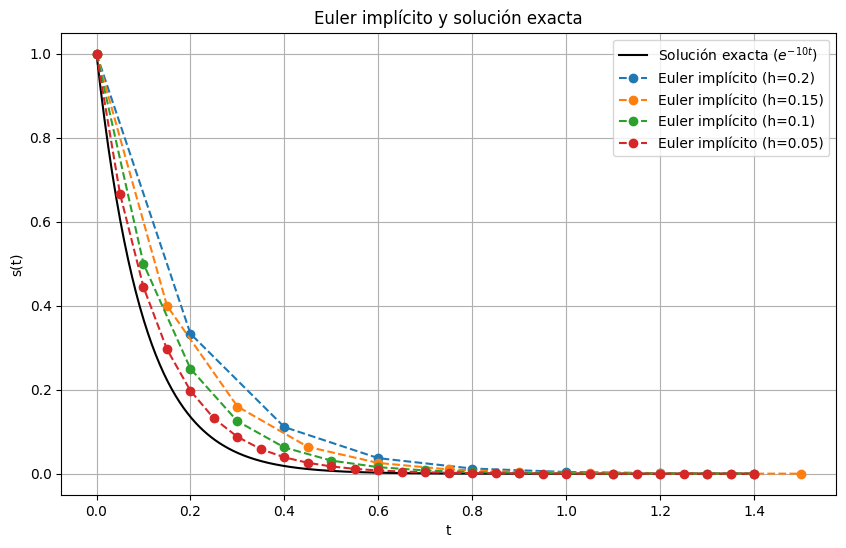

In [ ]:
# Importamos las bibliotecas
import numpy as np
import matplotlib.pyplot as plt

# Definimos los diferentes valores de paso h que vamos a utilizar
h = [0.2, 0.15, 0.1, 0.05]  # Valores de h para comparar resultados

# Definimos la función que implementa el método de Euler implícito
def euler_implicito(h, t_max):
    # Creamos un array de tiempos desde 0 hasta t_max con paso h
    t = np.arange(0, t_max + h, h)
    # Inicializamos un array para almacenar las soluciones con ceros
    s = np.zeros_like(t)
    # Establecemos la condición inicial s(0) = 1
    s[0] = 1
    # Iteramos sobre cada paso de tiempo
    for i in range(len(t) - 1):
        # Aplicamos la fórmula del Euler implícito para ds/dt = -10s(t)
        s[i+1] = s[i] / (1 + 10*h)
    # Devolvemos los tiempos y las soluciones calculadas
    return t, s

# Configuramos el gráfico para visualizar los resultados
plt.figure(figsize=(10, 6))  # Creamos una figura de 10x6 pulgadas

# Creamos un array de tiempos fino para la solución exacta
t0 = np.linspace(0, 1.4, 500)

# Definimos la función de la solución exacta para comparación
def solucion_exacta(t):
    """Solución exacta de la EDO ds/dt = -10s(t) con s(0)=1"""
    return np.exp(-10 * t)

# Graficamos la solución exacta
plt.plot(t0, solucion_exacta(t0), 'k-', label='Solución exacta ($e^{-10t}$)')

# Calculamos y graficamos las soluciones numéricas para cada valor de h

# Para h = 0.2
t1, s1 = euler_implicito(0.2, 1.4)
plt.plot(t1, s1, 'o--', label='Euler implícito (h=0.2)')

# Para h = 0.15
t2, s2 = euler_implicito(0.15, 1.4)
plt.plot(t2, s2, 'o--', label='Euler implícito (h=0.15)')

# Para h = 0.1
t3, s3 = euler_implicito(0.1, 1.4)
plt.plot(t3, s3, 'o--', label='Euler implícito (h=0.1)')

# Para h = 0.05
t4, s4 = euler_implicito(0.05, 1.4)
plt.plot(t4, s4, 'o--', label='Euler implícito (h=0.05)')

# Añadimos etiquetas y título al gráfico
plt.xlabel('t')  # Etiqueta del eje x
plt.ylabel('s(t)')  # Etiqueta del eje y
plt.title('Euler implícito y solución exacta')  # Título del gráfico

# Añadimos una leyenda para identificar cada curva
plt.legend()

# Habilitamos la cuadrícula para mejor visualización
plt.grid(True)

# Mostramos el gráfico
plt.show()

### **c) Comparación entre Euler implícito y explícito**  

En el método de Euler explícito, cuando resolvimos la ecuación $\frac{ds}{dt} = -10s$ con $h = 0.2$, la solución numérica se disparaba y daba resultados incorrectos (como se ve en la Figura 1 del problema). Esto pasa porque el método explícito es inestable para pasos grandes en ecuaciones rígidas como esta.  

Al usar el **método de Euler implícito**, la solución mejora mucho, incluso con los mismos valores de $h$ (0.2, 0.15, 0.1, 0.05). A diferencia del explícito, aquí la aproximación no se va a valores muy grandes, sino que sigue bien la curva de la solución real ($s(t) = e^{-10t}$), aunque con algún error dependiendo del tamaño de \(h\).  

Por lo tanto, el método de **Euler implícito** es mejor para ecuaciones como esta porque da soluciones estables sin necesidad de pasos $h$ microscópicos. Aunque el explícito es más fácil de programar, en casos reales con ecuaciones rígidas, el implícito es mejor :).

# **Ejercicio 5**

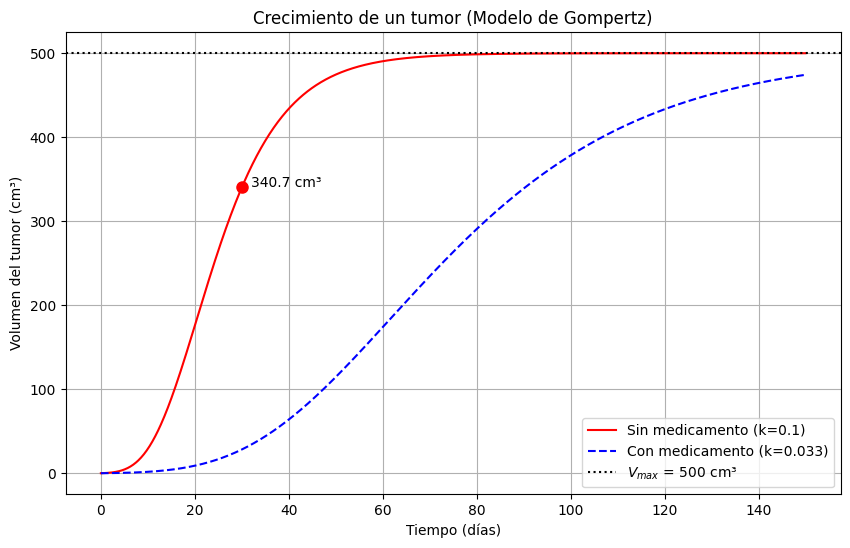

El tumor alcanza el 99% de V_max (~495 cm³) en 66.5 días sin medicamento.


In [ ]:
# Importamos las bibliotecas
import numpy as np
import matplotlib.pyplot as plt

# Definimos los parámetros del modelo de crecimiento tumoral
V_max = 500.0    # Volumen máximo teórico que puede alcanzar el tumor (en cm³)
k = 0.1          # Tasa de crecimiento natural del tumor (sin tratamiento)
k_med = k / 3    # Tasa de crecimiento reducida por efecto del medicamento
V0 = 0.2         # Volumen inicial del tumor (en cm³)

# Definimos la ecuación diferencial del modelo de Gompertz
def gompertz(V, t, k_gompertz):
    return -k_gompertz * V * np.log(V / V_max)

# Configuramos el dominio temporal para la simulación
a, b = 0.0, 150.0  # Rango de tiempo: desde 0 hasta 150 días
N = 1000            # Número de puntos en la discretización
h = (b - a) / N     # Tamaño del paso temporal
lista_t = np.arange(a, b, h)  # Creamos un array con los tiempos discretizados

# Simulación SIN medicamento (crecimiento natural)
V = V0  # Inicializamos con el volumen inicial
lista_V_sin_med = []  # Lista para almacenar los volúmenes a lo largo del tiempo

# Implementamos el método de Runge-Kutta de 4to orden para resolver la EDO
for t in lista_t:
    # Calculamos las cuatro pendientes características del método RK4
    k1 = h * gompertz(V, t, k)
    k2 = h * gompertz(V + 0.5 * k1, t + 0.5 * h, k)
    k3 = h * gompertz(V + 0.5 * k2, t + 0.5 * h, k)
    k4 = h * gompertz(V + k3, t + h, k)

    # Actualizamos el volumen usando la combinación ponderada de las pendientes
    V += (k1 + 2*k2 + 2*k3 + k4) / 6.0
    lista_V_sin_med.append(V)  # Guardamos el valor actual

# Simulación CON medicamento (crecimiento reducido)
V = V0  # Reinicializamos con el volumen inicial
lista_V_con_med = []  # Lista para almacenar los volúmenes con tratamiento

# Aplicamos nuevamente RK4 pero con la constante de crecimiento reducida
for t in lista_t:
    k1 = h * gompertz(V, t, k_med)
    k2 = h * gompertz(V + 0.5 * k1, t + 0.5 * h, k_med)
    k3 = h * gompertz(V + 0.5 * k2, t + 0.5 * h, k_med)
    k4 = h * gompertz(V + k3, t + h, k_med)

    V += (k1 + 2*k2 + 2*k3 + k4) / 6.0
    lista_V_con_med.append(V)

# Configuración de la gráfica para visualizar los resultados
plt.figure(figsize=(10, 6))  # Creamos una figura de 10x6 pulgadas

# Graficamos ambas curvas de crecimiento
plt.plot(lista_t, lista_V_sin_med, 'r-', label='Sin medicamento (k=0.1)')
plt.plot(lista_t, lista_V_con_med, 'b--', label='Con medicamento (k=0.033)')

# Añadimos una línea horizontal que marca el volumen máximo teórico
plt.axhline(y=V_max, color='k', linestyle=':', label='$V_{max}$ = 500 cm³')

# Marcamos y etiquetamos el volumen a los 30 días para el caso sin tratamiento
idx_30 = int(30 / h)  # Índice correspondiente a t=30 días
plt.plot(lista_t[idx_30], lista_V_sin_med[idx_30], 'ro', markersize=8)
plt.text(lista_t[idx_30]+2, lista_V_sin_med[idx_30],
         f'{lista_V_sin_med[idx_30]:.1f} cm³', fontsize=10)

# Configuramos los detalles estéticos del gráfico
plt.title('Crecimiento de un tumor (Modelo de Gompertz)')
plt.xlabel('Tiempo (días)')
plt.ylabel('Volumen del tumor (cm³)')
plt.legend()  # Mostramos la leyenda
plt.grid(True)  # Activamos la cuadrícula
plt.show()  # Mostramos el gráfico

# Calculamos cuántos días tarda en alcanzar el 99% del volumen máximo sin tratamiento
umbral = 0.99 * V_max  # Definimos el umbral (495 cm³)
for i, V in enumerate(lista_V_sin_med):
    if V >= umbral:
        dias_max = lista_t[i]
        break

# Imprimimos el resultado del cálculo
print(f"El tumor alcanza el 99% de V_max (~495 cm³) en {dias_max:.1f} días sin medicamento.")

## **Ejercicio 6**

Vamos a resolver el sistema de ecuaciones diferenciales utilizando el método de Runge-Kutta de 4to orden. Tenemos:

$$
\begin{cases}
m_1 \ddot{\theta}_1 = -k_1 \theta_1 + k_2 (\theta_2 - \theta_1), \\
m_2 \ddot{\theta}_2 = -k_2 (\theta_2 - \theta_1),
\end{cases}
$$

con $m_1 = m_2 = 1$, $k_1 = 0.3$, $k_2 = 0.8$, y condiciones iniciales:

$$
\theta_1(0) = 0, \dot{\theta}_1(0) = 0,\theta_2(0) = \frac{\pi}{3}, \dot{\theta}_2(0) = 0.
$$

Primero, definimos variables auxiliares para convertir las EDOs de segundo orden en un sistema de primer orden:

$$
\begin{cases}
\dot{\theta}_1 = \omega_1, \\
\dot{\omega}_1 = \frac{1}{m_1} \left( -k_1 \theta_1 + k_2 (\theta_2 - \theta_1) \right), \\
\dot{\theta}_2 = \omega_2, \\
\dot{\omega}_2 = \frac{1}{m_2} \left( -k_2 (\theta_2 - \theta_1) \right).
\end{cases}
$$

Sustituimos los valores ($m_1 = m_2 = 1$, $k_1 = 0.3$, $k_2 = 0.8$):

$$
\begin{cases}
\dot{\theta}_1 = \omega_1, \\
\dot{\omega}_1 = -0.3 \theta_1 + 0.8 (\theta_2 - \theta_1) = -1.1 \theta_1 + 0.8 \theta_2, \\
\dot{\theta}_2 = \omega_2, \\
\dot{\omega}_2 = -0.8 (\theta_2 - \theta_1) = 0.8 \theta_1 - 0.8 \theta_2.
\end{cases}
$$


Vamos a resolver el sistema en el intervalo $t \in [0, 30]$ usando el método de Runge-Kutta de 4to orden (RK4):

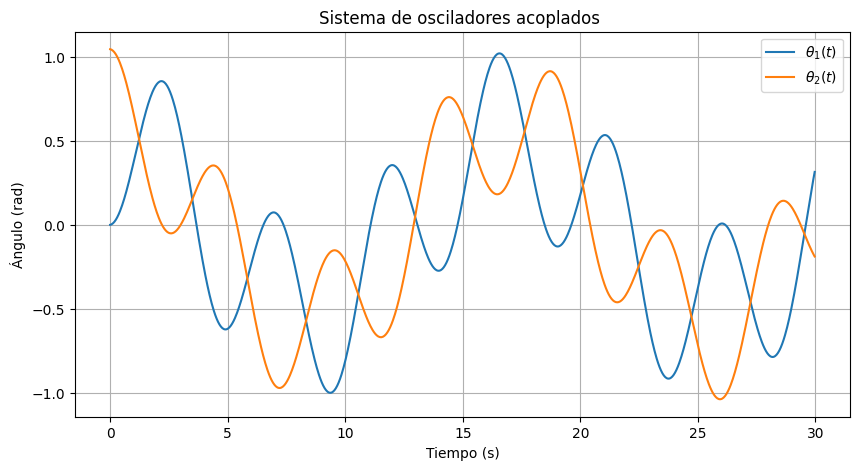

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos el sistema de ecuaciones diferenciales
def f(r, t):
    theta1, omega1, theta2, omega2 = r
    dtheta1 = omega1
    domega1 = -1.1 * theta1 + 0.8 * theta2
    dtheta2 = omega2
    domega2 = 0.8 * theta1 - 0.8 * theta2
    return np.array([dtheta1, domega1, dtheta2, domega2], float)

# Parámetros del tiempo
a, b = 0.0, 30.0
h = 0.03
lista_t = np.arange(a, b, h)

# Condiciones iniciales
r = np.array([0, 0, np.pi/3, 0], float)

# Listas para almacenar resultados
theta1_list, omega1_list = [], []
theta2_list, omega2_list = [], []

# Método de Runge-Kutta de orden 4
for t in lista_t:
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2*k2 + 2*k3 + k4) / 6.0
    theta1_list.append(r[0])
    omega1_list.append(r[1])
    theta2_list.append(r[2])
    omega2_list.append(r[3])

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(lista_t, theta1_list, label=r'$\theta_1(t)$')
plt.plot(lista_t, theta2_list, label=r'$\theta_2(t)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Sistema de osciladores acoplados ')
plt.grid()
plt.legend()
plt.show()


2. Tenemos:

$$
\begin{cases}
m_1 \ddot{\theta}_1 = -k_1 \theta_1 + k_2 (\theta_2 - \theta_1), \\
m_2 \ddot{\theta}_2 = -k_2 (\theta_2 - \theta_1).
\end{cases}
$$

Sustituimos los nuevos valores ($m_1 = 1$, $m_2 = 2$, $k_1 = 1$, $k_2 = 0.8$):

$$
\begin{cases}
\ddot{\theta}_1 = -1 \theta_1 + 0.8 (\theta_2 - \theta_1) = -1.8 \theta_1 + 0.8 \theta_2, \\
\ddot{\theta}_2 = \frac{1}{2} \left( -0.8 (\theta_2 - \theta_1) \right) = 0.4 \theta_1 - 0.4 \theta_2.
\end{cases}
$$

Definimos variables para convertir el sistema en primer orden:
$$
\begin{cases}
\dot{\theta}_1 = \omega_1, \\
\dot{\omega}_1 = -1.8 \theta_1 + 0.8 \theta_2, \\
\dot{\theta}_2 = \omega_2, \\
\dot{\omega}_2 = 0.4 \theta_1 - 0.4 \theta_2.
\end{cases}
$$

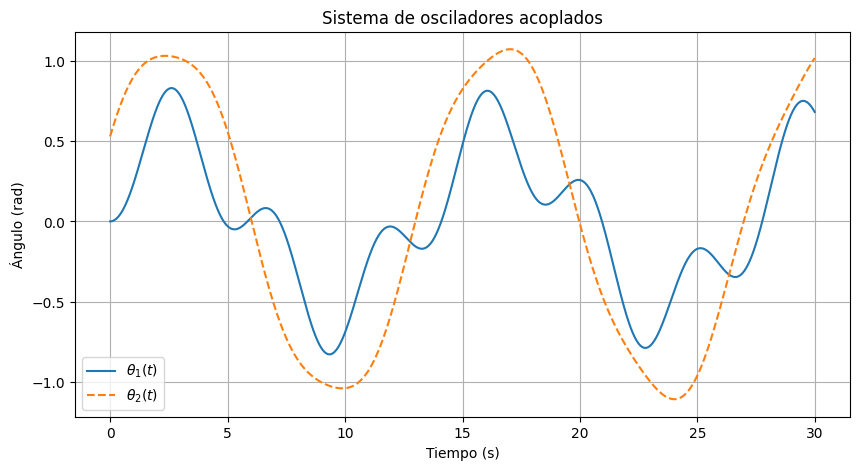

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el sistema de ecuaciones diferenciales
def f(r, t):
    theta1, omega1, theta2, omega2 = r
    dtheta1 = omega1
    domega1 = -1.8 * theta1 + 0.8 * theta2
    dtheta2 = omega2
    domega2 = 0.4 * theta1 - 0.4 * theta2
    return np.array([dtheta1, domega1, dtheta2, domega2], float)

# Parámetros del tiempo
a, b = 0.0, 30.0
h = 0.01
lista_t = np.arange(a, b, h)

# Condiciones iniciales
r = np.array([0, 0, np.pi/6, 0.5], float)

# Listas para almacenar resultados
theta12_list, omega12_list = [], []
theta22_list, omega22_list = [], []

# Método de Runge-Kutta de orden 4
for t in lista_t:
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2*k2 + 2*k3 + k4) / 6.0
    theta12_list.append(r[0])
    omega12_list.append(r[1])
    theta22_list.append(r[2])
    omega22_list.append(r[3])

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(lista_t, theta12_list, label=r'$\theta_1(t)$')
plt.plot(lista_t, theta22_list, label=r'$\theta_2(t)$',linestyle='--')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Sistema de osciladores acoplados')
plt.grid()
plt.legend()
plt.show()

### **Análisis Comparativo de los Dos Sistemas de Osciladores Acoplados**

## **1. Primer Sistem**
El espacio fase de $\theta_1\:vs\:\omega_1$. Como $\dot{\theta}_1(0) = 0$, la trayectoria parte del eje $\theta_1$. Debido al acoplamiento ($k_2 = 0.8$), $\theta_1$ oscila influenciado por $\theta_2$. Las órbitas son elípticas, pero cerradas (conservación de energía).

El espacio fase de $\theta_2$ vs $\omega_2$. $\theta_2$ inicia en $\frac{\pi}{3}$, induciendo una oscilación inicial fuerte. La energía se transfiere a $\theta_1$ debido al acoplamiento.

La relación $\theta_1$ vs $\theta_2$. Muestra cómo los dos péndulos intercambian energía. Los péndulos están desfasados, aparecen figuras de Lissajous.

**Significado físico**:
- Ambos péndulos tienen la misma masa, por lo que responden de manera simétrica al acoplamiento.
- El sistema exhibe **modos normales de oscilación**:  
  - **Modo simétrico**: $\theta_1$ y $\theta_2$ oscilan en fase.  
  - **Modo antisimétrico**: $\theta_1$ y $\theta_2$ oscilan en oposición de fase.  

---

## **2. Segundo Sistema**
El espacio fase de $\theta_1$ vs $\omega_1$.La masa menor ($m_1 = 1$) oscila más rápido. La velocidad inicial de $\theta_2$ ($\dot{\theta}_2(0) = 0.5$) perturba el movimiento de $\theta_1$.

El espacio fase de $\theta_2$ vs $\omega_2$. La masa mayor ($m_2 = 2$) tiene inercia, por lo que sus oscilaciones son más lentas. Las trayectorias son más amplias pero menos frecuentes.

La Relación $\theta_1$ vs $\theta_2$. Muestra un acoplamiento más complejo debido a la diferencia de masas. La energía se transfiere de manera asimétrica.

**Significado físico**:
- La masa desigual ($m_2 = 2m_1$) rompe la simetría del sistema.
- El péndulo más pesado ($\theta_2$) domina la dinámica, pero el más ligero ($\theta_1$) responde más rápido.
- ¿La velocidad inicial de $\theta_2$ ($\dot{\theta}_2 = 0.5$) añade energía cinética, haciendo que el sistema empiece en un estado no equilibrado.


## **Conclusión**
- El **primer sistema** muestra un comportamiento más simétrico, típico de osciladores acoplados con masas iguales.

- El **segundo sistema** es más complejo debido a la masa desigual y la velocidad inicial, lo que genera un intercambio de energía menos predecible.

- El **espacio fase** nos permite visualizar cómo la energía se distribuye entre los péndulos y cómo las condiciones iniciales afectan la dinámica a largo plazo.

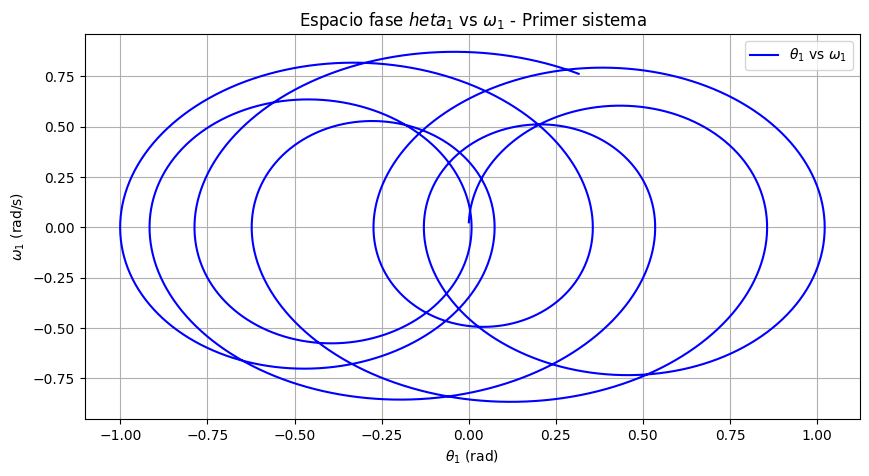

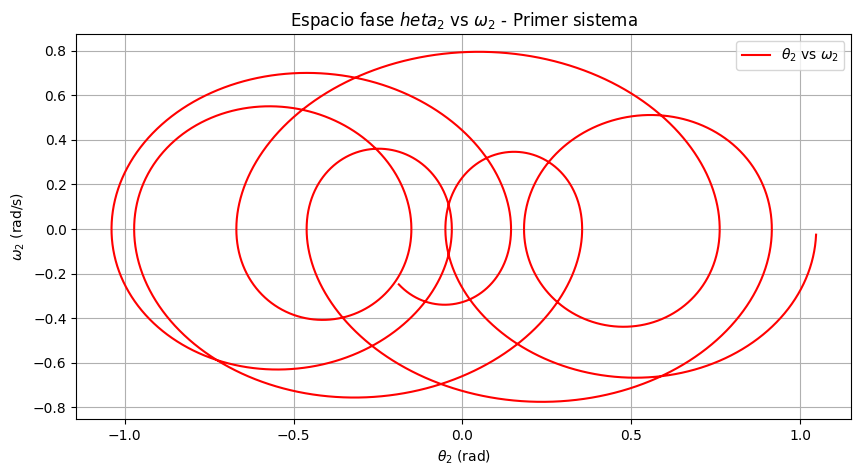

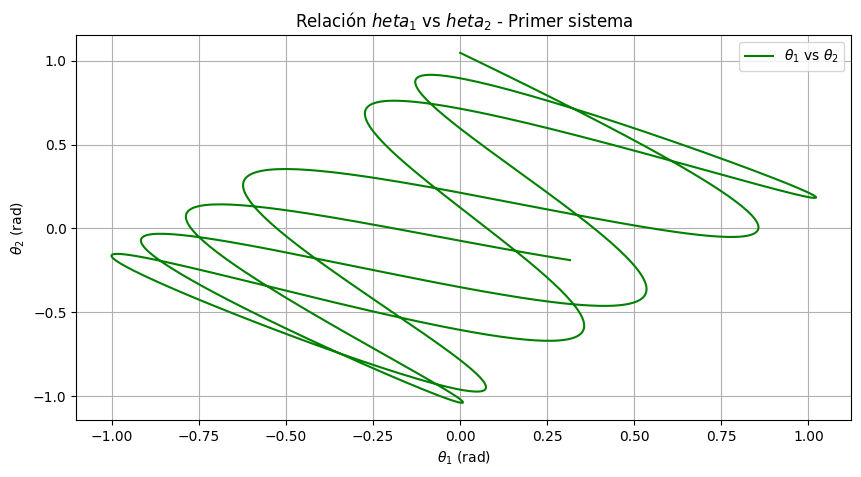

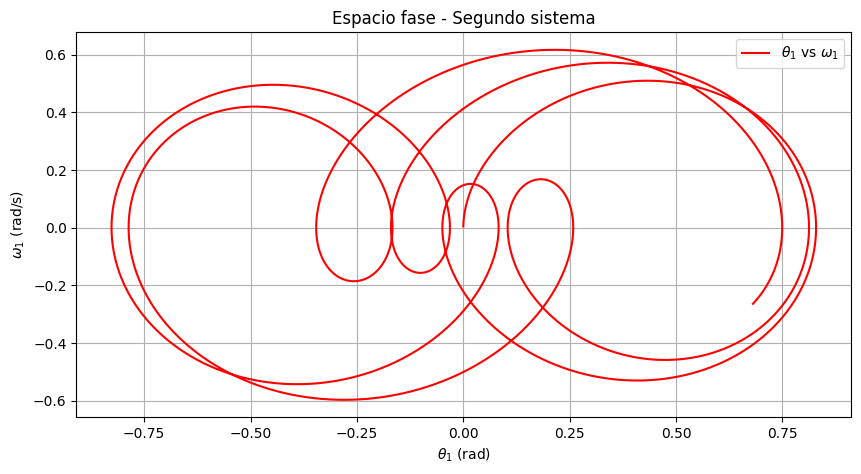

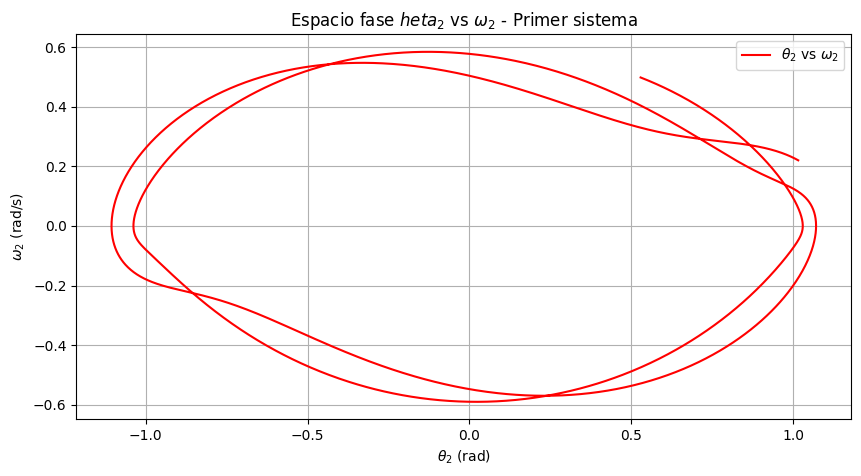

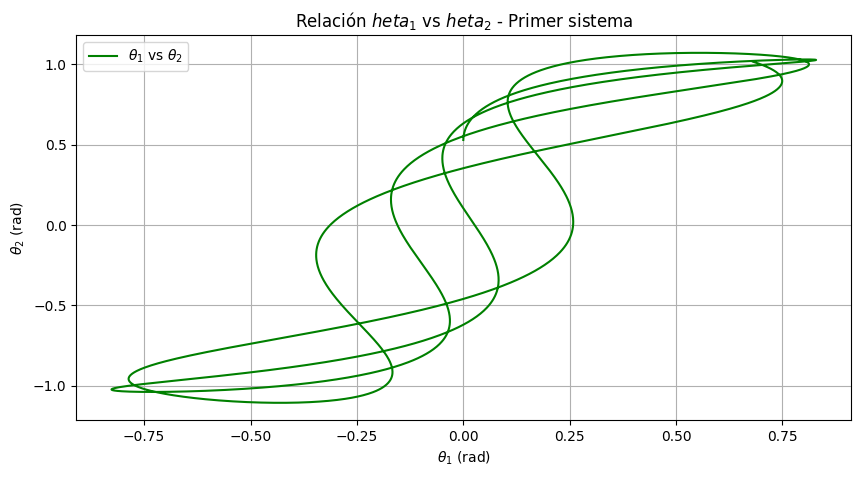

In [ ]:
# Para el primer sistema
#theta_1 vs omega1
plt.figure(figsize=(10, 5))
plt.plot(theta1_list, omega1_list, label=r'$\theta_1$ vs $\omega_1$', color='blue')
plt.xlabel(r'$\theta_1$ (rad)')
plt.ylabel(r'$\omega_1$ (rad/s)')
plt.title('Espacio fase $\theta_1$ vs $\omega_1$ - Primer sistema')
plt.grid()
plt.legend()
plt.show()

#theta_2 vs omega2
plt.figure(figsize=(10, 5))
plt.plot(theta2_list, omega2_list, label=r'$\theta_2$ vs $\omega_2$', color='red')
plt.xlabel(r'$\theta_2$ (rad)')
plt.ylabel(r'$\omega_2$ (rad/s)')
plt.title('Espacio fase $\theta_2$ vs $\omega_2$ - Primer sistema')
plt.grid()
plt.legend()
plt.show()

#theta_1 vs theta_2
plt.figure(figsize=(10, 5))
plt.plot(theta1_list, theta2_list, label=r'$\theta_1$ vs $\theta_2$', color='green')
plt.xlabel(r'$\theta_1$ (rad)')
plt.ylabel(r'$\theta_2$ (rad)')
plt.title('Relación $\theta_1$ vs $\theta_2$ - Primer sistema')
plt.grid()
plt.legend()
plt.show()


# Para el segundo sistema
plt.figure(figsize=(10, 5))
plt.plot(theta12_list, omega12_list, label=r'$\theta_1$ vs $\omega_1$', color='red')
plt.xlabel(r'$\theta_1$ (rad)')
plt.ylabel(r'$\omega_1$ (rad/s)')
plt.title('Espacio fase - Segundo sistema')
plt.grid()
plt.legend()
plt.show()

#theta_2 vs omega2
plt.figure(figsize=(10, 5))
plt.plot(theta22_list, omega22_list, label=r'$\theta_2$ vs $\omega_2$', color='red')
plt.xlabel(r'$\theta_2$ (rad)')
plt.ylabel(r'$\omega_2$ (rad/s)')
plt.title('Espacio fase $\theta_2$ vs $\omega_2$ - Primer sistema')
plt.grid()
plt.legend()
plt.show()

#theta_1 vs theta_2
plt.figure(figsize=(10, 5))
plt.plot(theta12_list, theta22_list, label=r'$\theta_1$ vs $\theta_2$', color='green')
plt.xlabel(r'$\theta_1$ (rad)')
plt.ylabel(r'$\theta_2$ (rad)')
plt.title('Relación $\theta_1$ vs $\theta_2$ - Primer sistema')
plt.grid()
plt.legend()
plt.show()